# Finding Portfolio Weights

In [1]:
# Libraries
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt

import math
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['RIVN', 'LCID', 'GM', 'F', 'HMC', 'TSLA']
start = '2021-12-01'
end = '2022-09-02'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,F,GM,HMC,LCID,RIVN,TSLA
Date,,,,,,
2021-12-01 00:00:00-05:00,19.160006,57.927746,27.730000,51.139999,115.690002,365.000000
2021-12-02 00:00:00-05:00,19.443787,60.881001,28.410000,48.410000,110.769997,361.533325
2021-12-03 00:00:00-05:00,18.729443,59.573986,28.219999,47.270000,104.669998,338.323334
2021-12-06 00:00:00-05:00,18.807726,59.703690,28.330000,44.860001,116.779999,336.336670
2021-12-07 00:00:00-05:00,19.531855,61.389839,28.889999,43.880001,116.180000,350.583344


In [3]:
stocks_data = df.iloc[::]

In [4]:
stocks_data

,F,GM,HMC,LCID,RIVN,TSLA
Date,,,,,,
2021-12-01 00:00:00-05:00,19.160006,57.927746,27.730000,51.139999,115.690002,365.000000
2021-12-02 00:00:00-05:00,19.443787,60.881001,28.410000,48.410000,110.769997,361.533325
2021-12-03 00:00:00-05:00,18.729443,59.573986,28.219999,47.270000,104.669998,338.323334
2021-12-06 00:00:00-05:00,18.807726,59.703690,28.330000,44.860001,116.779999,336.336670
2021-12-07 00:00:00-05:00,19.531855,61.389839,28.889999,43.880001,116.180000,350.583344
...,...,...,...,...,...,...
2022-08-26 00:00:00-04:00,15.410000,39.140636,26.340000,16.240000,32.110001,288.089996
2022-08-29 00:00:00-04:00,15.570000,39.419998,26.799999,16.170000,32.310001,284.820007
2022-08-30 00:00:00-04:00,15.450000,39.130001,26.650000,15.150000,31.889999,277.700012


In [5]:
stocks_data.describe()

,F,GM,HMC,LCID,RIVN,TSLA
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,16.028843,43.533265,27.127474,24.879368,50.250763,293.649333
std,3.285391,9.157063,2.057405,8.766597,26.545455,43.725159
min,10.950784,30.799683,23.400000,13.860000,20.600000,209.386673
25%,13.374115,37.057892,25.367500,18.392499,31.450000,255.724998
50%,15.665981,39.993690,26.795000,21.280001,38.190001,293.566666
75%,17.783144,50.292676,28.469999,27.852500,63.639999,330.740829
max,24.649670,65.590248,31.969999,51.139999,122.120003,399.926666


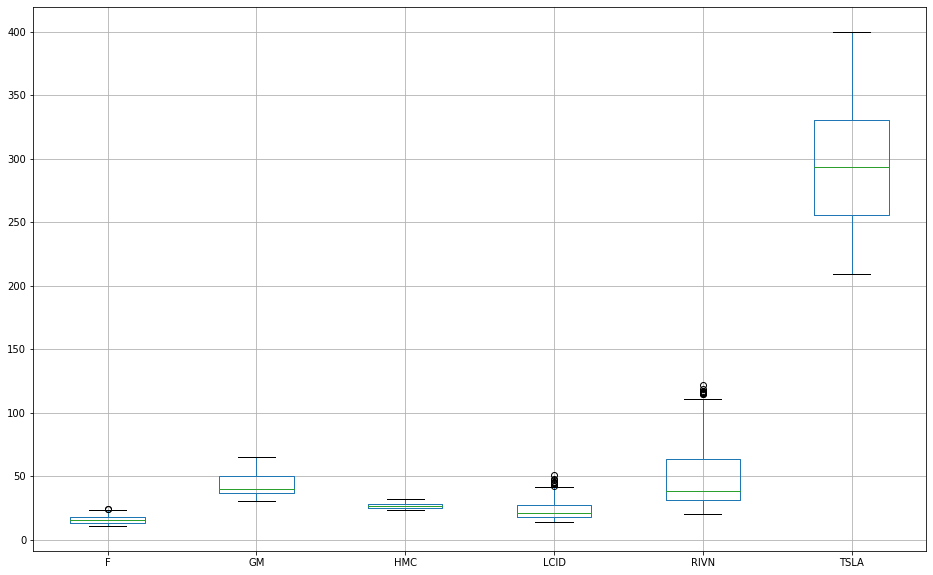

In [6]:
plt.figure(figsize=(16,10))
pd.DataFrame.boxplot(stocks_data)
plt.show() 

In [7]:
stocks_data=stocks_data.sort_index(axis=0,ascending=True)
#calc_returns = lambda x: np.log(x / x.shift(1))[1:]  
#stocks_ret = stocks_data.apply(calc_returns)  # get stocks' return
stocks_ret = stocks_data.pct_change()
stocks_ret = stocks_ret.dropna() # skip the first row (NaN)
len(stocks_ret)

189

In [8]:
stocks_ret.head()

,F,GM,HMC,LCID,RIVN,TSLA
Date,,,,,,
2021-12-02 00:00:00-05:00,0.014811,0.050982,0.024522,-0.053383,-0.042527,-0.009498
2021-12-03 00:00:00-05:00,-0.036739,-0.021468,-0.006688,-0.023549,-0.055069,-0.064199
2021-12-06 00:00:00-05:00,0.004180,0.002177,0.003898,-0.050984,0.115697,-0.005872
2021-12-07 00:00:00-05:00,0.038502,0.028242,0.019767,-0.021846,-0.005138,0.042358
2021-12-08 00:00:00-05:00,-0.007515,-0.012189,-0.016269,0.019143,0.051128,0.016363


In [9]:
ret_sigma=stocks_ret.cov()
ret_sigma

,F,GM,HMC,LCID,RIVN,TSLA
F,0.001010,0.000814,0.000356,0.000782,0.000909,0.000725
GM,0.000814,0.000824,0.000341,0.000741,0.000837,0.000710
HMC,0.000356,0.000341,0.000300,0.000418,0.000499,0.000348
LCID,0.000782,0.000741,0.000418,0.002751,0.002177,0.001397
RIVN,0.000909,0.000837,0.000499,0.002177,0.003384,0.001465
TSLA,0.000725,0.000710,0.000348,0.001397,0.001465,0.001760


In [10]:
stocks_ret.corr()

,F,GM,HMC,LCID,RIVN,TSLA
F,1.000000,0.892124,0.647018,0.469228,0.491926,0.544138
GM,0.892124,1.000000,0.685049,0.492199,0.501319,0.589754
HMC,0.647018,0.685049,1.000000,0.460545,0.494932,0.478893
LCID,0.469228,0.492199,0.460545,1.000000,0.713478,0.634874
RIVN,0.491926,0.501319,0.494932,0.713478,1.000000,0.600280
TSLA,0.544138,0.589754,0.478893,0.634874,0.600280,1.000000


In [11]:
market = '^DJI'
mk = yf.download(market, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [12]:
mk.pct_change()

Date
2021-12-01 00:00:00-05:00         NaN
2021-12-02 00:00:00-05:00    0.018157
2021-12-03 00:00:00-05:00   -0.001724
2021-12-06 00:00:00-05:00    0.018709
2021-12-07 00:00:00-05:00    0.013978
                               ...   
2022-08-26 00:00:00-04:00   -0.030289
2022-08-29 00:00:00-04:00   -0.005712
2022-08-30 00:00:00-04:00   -0.009599
2022-08-31 00:00:00-04:00   -0.008821
2022-09-01 00:00:00-04:00    0.004633
Name: Adj Close, Length: 190, dtype: float64

In [13]:
mk.index

DatetimeIndex(['2021-12-01 00:00:00-05:00', '2021-12-02 00:00:00-05:00',
               '2021-12-03 00:00:00-05:00', '2021-12-06 00:00:00-05:00',
               '2021-12-07 00:00:00-05:00', '2021-12-08 00:00:00-05:00',
               '2021-12-09 00:00:00-05:00', '2021-12-10 00:00:00-05:00',
               '2021-12-13 00:00:00-05:00', '2021-12-14 00:00:00-05:00',
               ...
               '2022-08-19 00:00:00-04:00', '2022-08-22 00:00:00-04:00',
               '2022-08-23 00:00:00-04:00', '2022-08-24 00:00:00-04:00',
               '2022-08-25 00:00:00-04:00', '2022-08-26 00:00:00-04:00',
               '2022-08-29 00:00:00-04:00', '2022-08-30 00:00:00-04:00',
               '2022-08-31 00:00:00-04:00', '2022-09-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=190, freq=None)

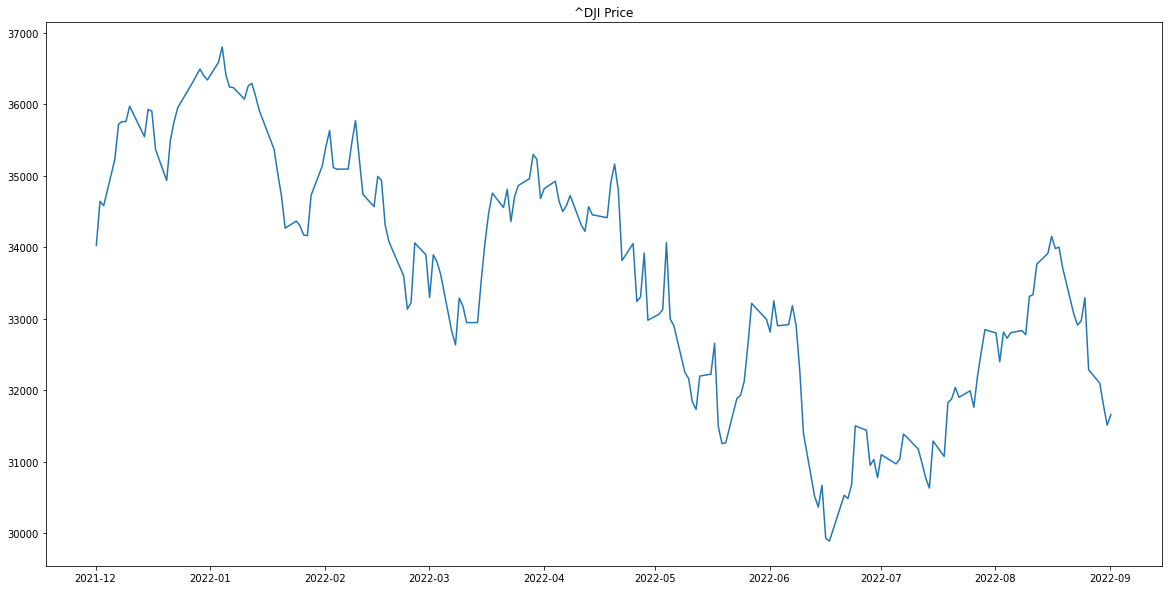

In [14]:
plt.figure(figsize=(20,10))
plt.plot(mk)
plt.title(market + " Price")
plt.show()

In [15]:
dji_ret=mk.pct_change()
dji_ret=dji_ret[1:]

In [16]:
# Calculate the correlation between the index and stocks
codata=stocks_ret
codata['^DJI']=dji_ret

In [17]:
codata

,F,GM,HMC,LCID,RIVN,TSLA,^DJI
Date,,,,,,,
2021-12-02 00:00:00-05:00,0.014811,0.050982,0.024522,-0.053383,-0.042527,-0.009498,0.018157
2021-12-03 00:00:00-05:00,-0.036739,-0.021468,-0.006688,-0.023549,-0.055069,-0.064199,-0.001724
2021-12-06 00:00:00-05:00,0.004180,0.002177,0.003898,-0.050984,0.115697,-0.005872,0.018709
2021-12-07 00:00:00-05:00,0.038502,0.028242,0.019767,-0.021846,-0.005138,0.042358,0.013978
2021-12-08 00:00:00-05:00,-0.007515,-0.012189,-0.016269,0.019143,0.051128,0.016363,0.000989
...,...,...,...,...,...,...,...
2022-08-26 00:00:00-04:00,-0.032643,-0.028720,-0.025527,-0.043581,-0.024012,-0.026953,-0.030289
2022-08-29 00:00:00-04:00,0.010383,0.007137,0.017464,-0.004310,0.006229,-0.011351,-0.005712
2022-08-30 00:00:00-04:00,-0.007707,-0.007357,-0.005597,-0.063080,-0.012999,-0.024998,-0.009599


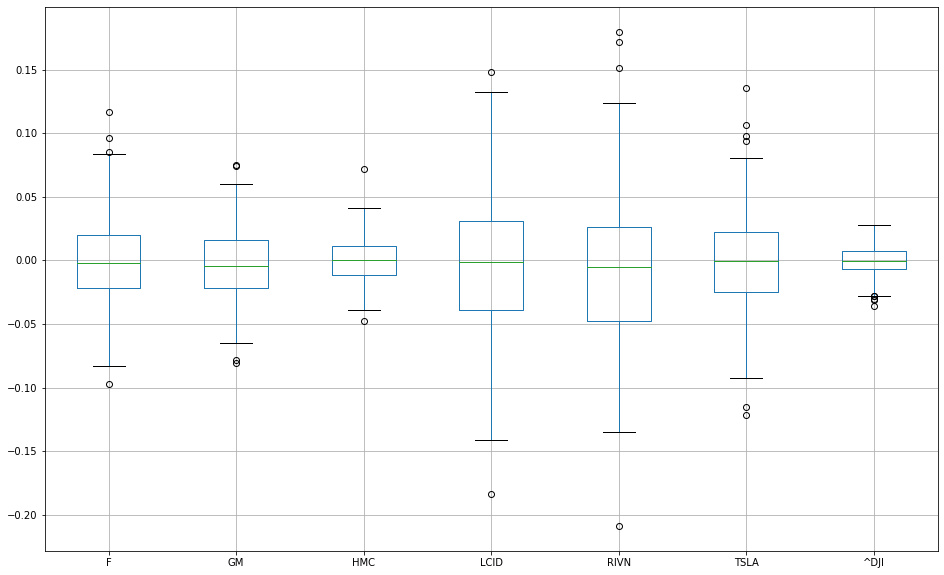

In [18]:
plt.figure(figsize=(16,10))
pd.DataFrame.boxplot(codata)
plt.show()

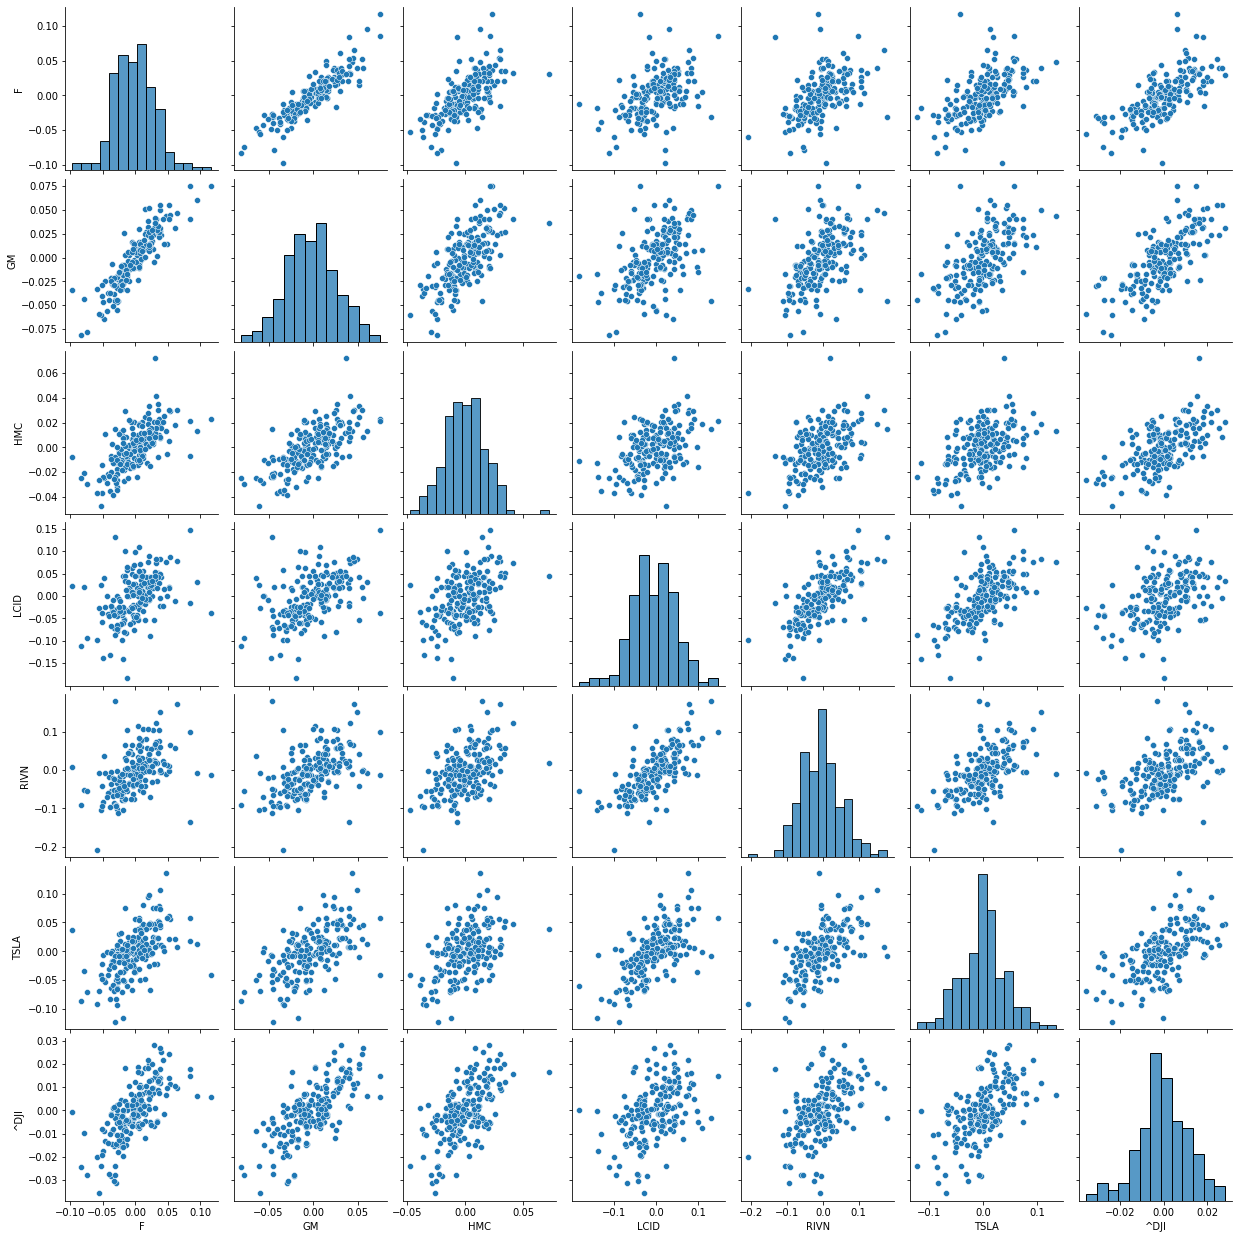

In [19]:
sns.pairplot(codata)
plt.show()

In [20]:
ret_cor = codata.corr()
ret_cor

,F,GM,HMC,LCID,RIVN,TSLA,^DJI
F,1.000000,0.892124,0.647018,0.469228,0.491926,0.544138,0.687192
GM,0.892124,1.000000,0.685049,0.492199,0.501319,0.589754,0.720825
HMC,0.647018,0.685049,1.000000,0.460545,0.494932,0.478893,0.609317
LCID,0.469228,0.492199,0.460545,1.000000,0.713478,0.634874,0.429555
RIVN,0.491926,0.501319,0.494932,0.713478,1.000000,0.600280,0.500911
TSLA,0.544138,0.589754,0.478893,0.634874,0.600280,1.000000,0.582040
^DJI,0.687192,0.720825,0.609317,0.429555,0.500911,0.582040,1.000000


In [21]:
stocks_ret = stocks_ret.dropna()

In [22]:
# USING SKLEARN
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=7)
pc = sklearn_pca.fit_transform(stocks_ret)

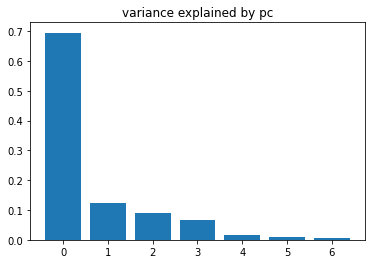

In [23]:
# plot the variance explained by pcs
plt.bar(range(7),sklearn_pca.explained_variance_ratio_)
plt.title('variance explained by pc')
plt.show()

In [24]:
# check the explained variance reatio
sklearn_pca.explained_variance_ratio_

array([0.69492957, 0.12208242, 0.08859084, 0.06540034, 0.01457331,
       0.00899   , 0.00543351])

In [25]:
sum(sklearn_pca.explained_variance_ratio_)

0.9999999999999999

In [26]:
# we are interesting to the relative importance of each components.so we will normalize the values.
cal_weight=lambda x:x/x.sum()
get_weight=cal_weight(sklearn_pca.explained_variance_ratio_)
get_weight 

array([0.69492957, 0.12208242, 0.08859084, 0.06540034, 0.01457331,
       0.00899   , 0.00543351])

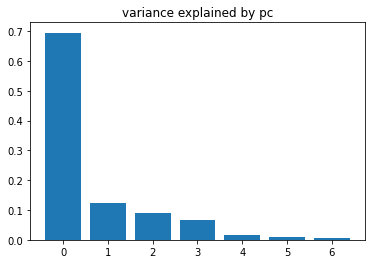

In [27]:
# plot the weight of the variance explained by pcs
plt.bar(range(7),get_weight)
plt.title('variance explained by pc')
plt.show()

In [28]:
sklearn_pca.explained_variance_ratio_.cumsum() # Cumulative weights.

array([0.69492957, 0.81701199, 0.90560283, 0.97100317, 0.98557649,
       0.99456649, 1.        ])

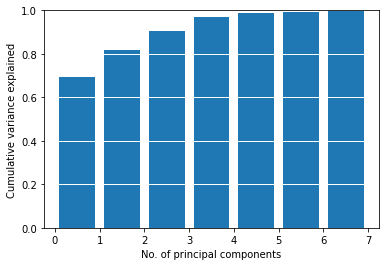

In [29]:
plt.bar(np.arange(7) + .5,sklearn_pca.explained_variance_ratio_.cumsum())
plt.ylim((0, 1))
plt.xlabel('No. of principal components')
plt.ylabel('Cumulative variance explained')
plt.grid(axis = 'y', ls = '-', lw = 1, color = 'white')
plt.show()

In [30]:
# get the Principal components
pcs =sklearn_pca.components_
# first component
pc1 = pcs[0,:]
pc1

array([-0.25607413, -0.23833939, -0.12778284, -0.55004323, -0.62646588,
       -0.39782938, -0.08953581])

In [31]:
# get the Principal components
pcs =sklearn_pca.components_
# first component
pc1 = pcs[0,:]
pc1

array([-0.25607413, -0.23833939, -0.12778284, -0.55004323, -0.62646588,
       -0.39782938, -0.08953581])

In [32]:
# normalized to 1 
pc1_w = np.asmatrix(pc1/sum(pc1)).T

In [33]:
# apply our first and last componenet as weight of the stocks
pc1_ret = stocks_ret.values*pc1_w
# get the total return index of the first PC portfolio
pc1_ret = pd.DataFrame(data =pc1_ret, index= stocks_ret.index)
pc1_ret_idx= (pc1_ret+1).cumprod()
pc1_ret_idx.columns =['pc1']
pc1_ret_idx.head()

,pc1
Date,
2021-12-02 00:00:00-05:00,0.982905
2021-12-03 00:00:00-05:00,0.944843
2021-12-06 00:00:00-05:00,0.963799
2021-12-07 00:00:00-05:00,0.973067
2021-12-08 00:00:00-05:00,0.991051


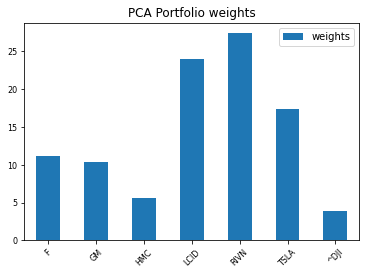

In [34]:
# plot the weights in the first PC
weights_df = pd.DataFrame(data = pc1_w*100,index = stocks_ret.columns)
weights_df.columns=['weights']

weights_df.plot.bar(title='PCA Portfolio weights',rot =45,fontsize =8)
plt.show()